In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

import seaborn as sns

HairCutBatch = pd.read_csv('First_batch_hair.csv')

In [186]:
#Change all days to uppercase

# I was trying to find a more dynamic way of doing this conversion to i.e. 13 = 1
# HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '1' + str(s) if len(str(s)) == 1 else s) 

HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '13' if s == 1 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '14' if s == 2 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '15' if s == 3 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '16' if s == 4 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '17' if s == 5 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '18' if s == 6 else s) 
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '19' if s == 7 else s)
HairCutBatch['Time'] = HairCutBatch.Time.apply(lambda s: '20' if s == 8 else s) 

HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Tue' if s == "Tues" else s) 
HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Thu' if s == "Thurs" else s) 
HairCutBatch['Day'] = HairCutBatch.Day.apply(lambda s: 'Thu' if s == "Thur" else s) 


HairCutBatch['Day'] = HairCutBatch['Day'].str.upper()
#Cannot find a way to convert partial date name string to full date object
# HairCutBatch['Day'] = pd.to_datetime(HairCutBatch['Day'])
HairCutBatch['Time'] = pd.to_datetime(HairCutBatch['Time'], format='%H').dt.strftime('%H:%M')

HairCutBatch.head(100)

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17:00,FRI,I,NM,30
1,1.0,14:00,TUE,E,NM,10
2,1.0,19:00,TUE,I,NM,35
3,2.0,17:00,MON,I,NM,35
4,2.0,12:00,FRI,M,NM,15
...,...,...,...,...,...,...
95,10.0,12:00,THU,M,NM,30
96,10.0,15:00,FRI,W,NM,30
97,10.0,13:00,SAT,W,M,35
98,10.0,15:00,SAT,A,NM,30


In [187]:
HairCutBatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tip amount  232 non-null    float64
 1   Time        232 non-null    object 
 2   Day         232 non-null    object 
 3   Culture     232 non-null    object 
 4   Married     232 non-null    object 
 5   Age         232 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.0+ KB


In [188]:
HairCutBatch.describe().T

,count,mean,std,min,25%,50%,75%,max
Tip amount,232.0,6.612069,5.195772,0.0,4.0,5.0,7.0,40.0
Age,232.0,31.607759,11.354063,3.0,30.0,30.0,40.0,70.0


In [189]:
HairCutBatch.head()

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17:00,FRI,I,NM,30
1,1.0,14:00,TUE,E,NM,10
2,1.0,19:00,TUE,I,NM,35
3,2.0,17:00,MON,I,NM,35
4,2.0,12:00,FRI,M,NM,15


In [190]:
HairCutBatch = HairCutBatch[HairCutBatch['Tip amount'].notnull()]

In [191]:
HairCutBatch.groupby('Married')['Tip amount'].mean()

Married
Kid    3.500000
M      6.224359
NM     6.830065
Name: Tip amount, dtype: float64

## This one is plotting the tip amount agains age of customers and culture

c:\py-env\aai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


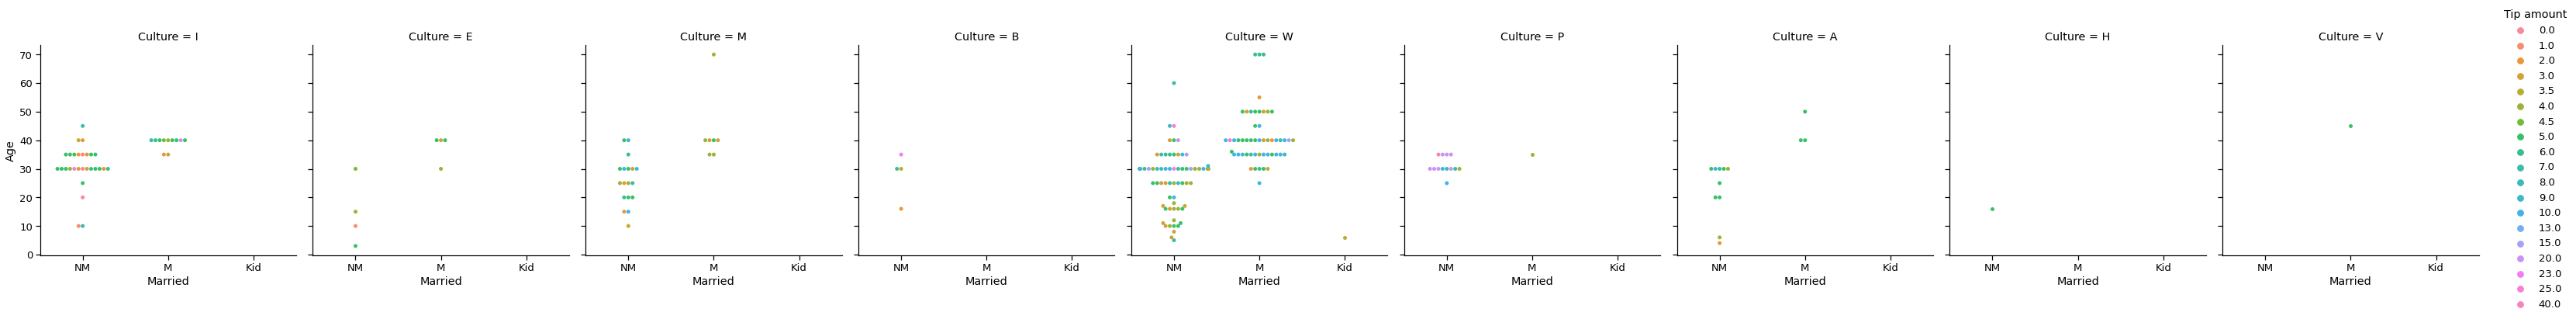

In [192]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Age',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

## This one is plotting the tip amount against culture

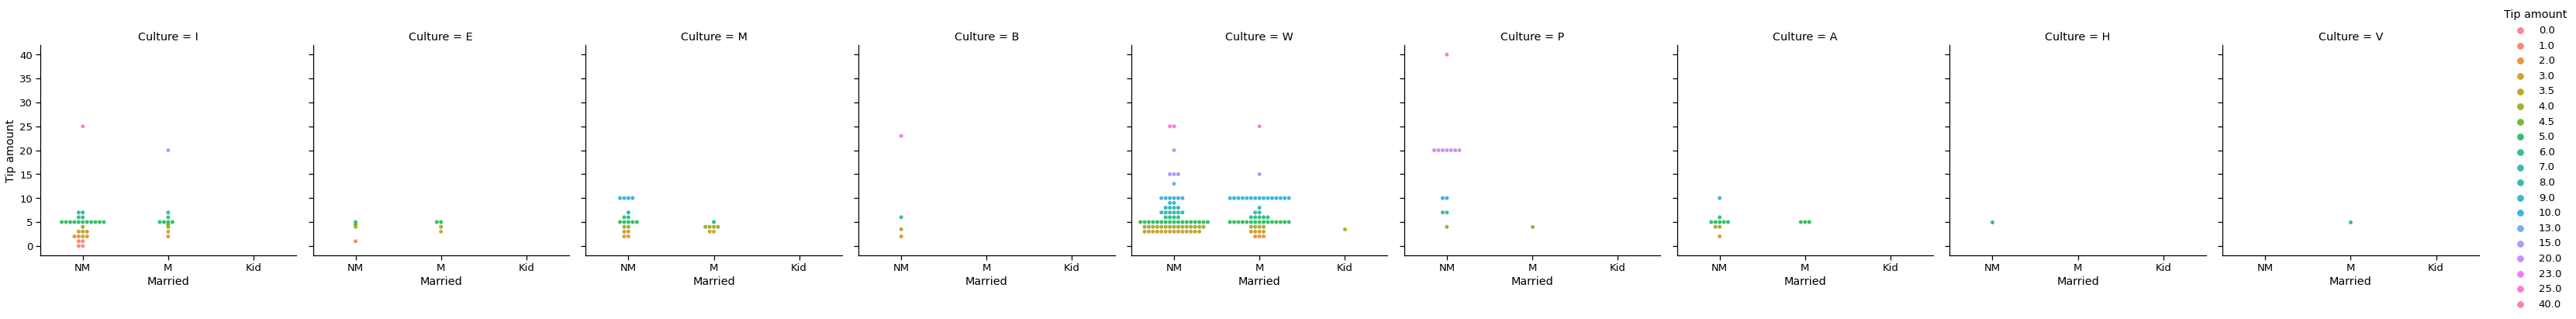

In [193]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Tip amount',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

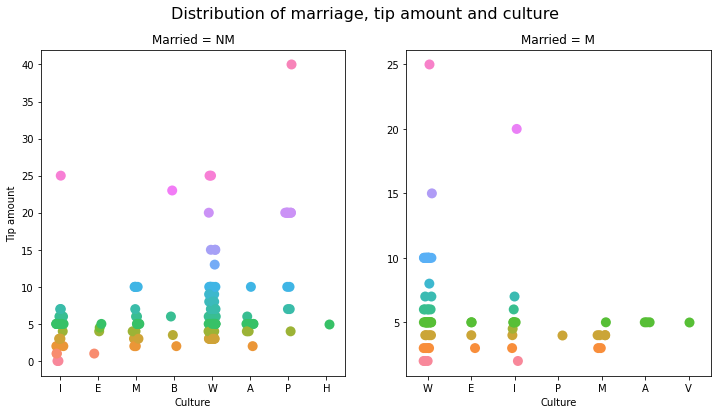

In [194]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Tip amount',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

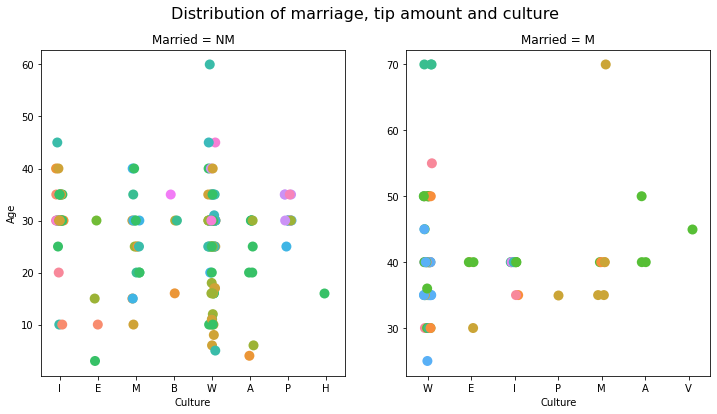

In [195]:

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Age',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

## Finding the highest tipping time of week

In [196]:
#Create pivot table before making heatmap
HeatplotDay = pd.pivot_table(HairCutBatch, values="Tip amount", index=['Day'], columns=['Time'])

#Reorder days on 0 axis
column_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
HeatplotDay = HeatplotDay.reindex(column_order, axis=0)

#View pivot table
HeatplotDay.head(100)

Time,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00
Day,,,,,,,,,,,
MON,12.500000,4.750000,4.000000,10.500000,4.000000,4.555556,5.600000,5.333333,10.0,NaN,NaN
TUE,4.000000,10.333333,5.500000,5.000000,5.833333,8.857143,11.200000,5.750000,14.5,3.666667,NaN
WED,16.250000,6.000000,6.000000,8.200000,4.333333,10.000000,3.500000,13.000000,NaN,NaN,NaN
THU,6.000000,5.000000,7.000000,4.666667,4.000000,6.500000,9.666667,6.500000,5.0,3.500000,NaN
FRI,7.000000,6.875000,4.875000,5.357143,6.666667,6.750000,5.000000,0.000000,6.0,8.750000,5.0
SAT,5.666667,5.857143,5.285714,4.772727,7.571429,4.714286,8.400000,5.800000,7.0,NaN,NaN
SUN,6.000000,3.250000,3.000000,6.750000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time', ylabel='Day'>

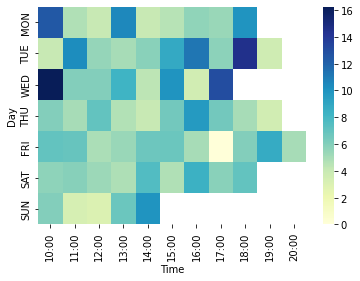

In [197]:
sns.heatmap(HeatplotDay, cmap="YlGnBu")

In [222]:
#Create pivot table before making regression
#Here I want to find regression of the number of times a tip is given between the day and time

Regression = pd.pivot_table(HairCutBatch, values='Tip amount', index=['Day'], columns=['Time'], aggfunc=lambda x: sum(x.value_counts())).reset_index()
# 
Regression['Amount'] = Regression.sum(axis=1).astype(float)
# Regression['Amount'] = Regression.astype(str).values.sum(axis=1)
# dates = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
# Regression = Regression.melt(id_vars=dates, var_name='Day', value_name='Amount')

#Reorder days on 0 axis
times = ['10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00']
Regression = Regression.drop(times ,axis= 1)

new_index = [1,2,3,4,5,6,7]
Regression['Date number'] = new_index
Regression['Date number'] = pd.to_numeric(Regression['Date number'], downcast="float")
Regression['Amount'] = pd.to_numeric(Regression['Amount'], downcast="float")
Regression.head(100)


C:\Users\Ingimar\AppData\Local\Temp/ipykernel_46820/2886042304.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Regression['Amount'] = Regression.sum(axis=1).astype(float)


Time,Day,Amount,Date number
0,FRI,42.0,1.0
1,MON,35.0,2.0
2,SAT,53.0,3.0
3,SUN,9.0,4.0
4,THU,23.0,5.0
5,TUE,39.0,6.0
6,WED,31.0,7.0


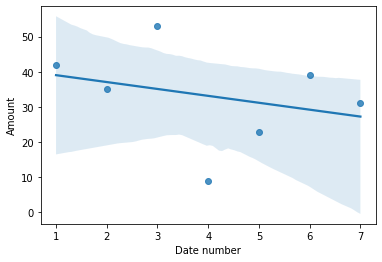

In [223]:
sns.regplot(x='Date number', y="Amount", data=Regression);

## Higest paying days

<AxesSubplot:xlabel='Day', ylabel='Amount'>

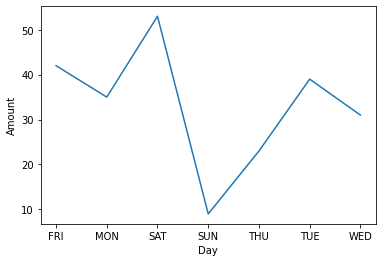

In [224]:
sns.lineplot(data=Regression, x="Day", y="Amount")